Zadanie 2

Symulowanie rozkładu normalnego metodą odwrotnej dystrybuanty.

In [10]:
import random
import numpy as np
import math
from scipy.special import erfinv
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [3]:

def norm_inv_cdf(mi, sig, num):
    sample = np.random.rand(num)
    return mi + sig * math.sqrt(2) * erfinv(2 * sample - 1)

In [32]:
mi = 0
sigma = 1
n_norm = 1000

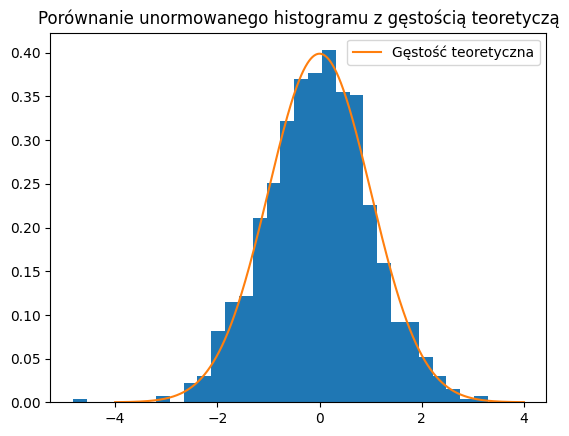

In [35]:
sample_inv_cdf = norm_inv_cdf(mi, sigma, n_norm)
ts = np.linspace(-4,4, 1000)
plt.hist(sample_inv_cdf, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

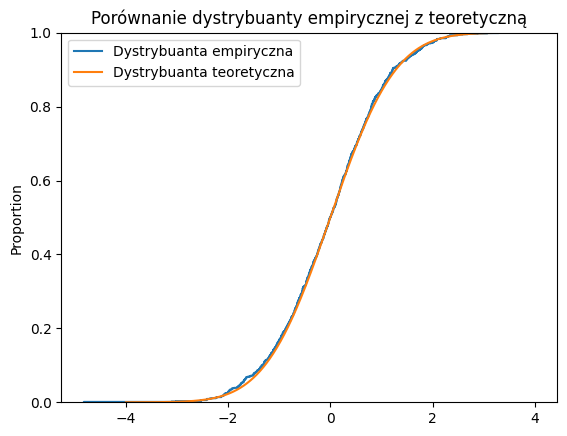

In [37]:
sns.ecdfplot(sample_inv_cdf, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [12]:
def exp_simulation(num, lambda_):
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [25]:
def norm_using_exp(mi, sigma, n):
    samples = []
    iterations = 1
    sigmas = [sigma] * n
    mis = [mi] * n
    while len(samples) < n:
        iterations += 1
        y = exp_simulation(1,1)[0]
        u = np.random.uniform()
        if u <= np.exp(-(y-1)**2/2):
            u2 = np.random.uniform()
            if u2 < 0.5:
                samples.append(y)
            else:
                samples.append(-y)
    return np.add(np.divide(samples,sigmas), mis), n*100/iterations
    

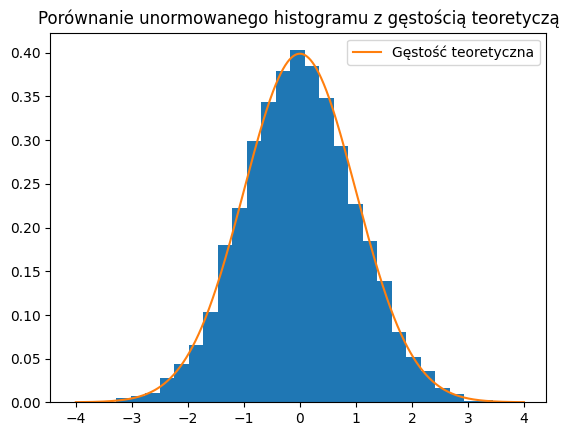

In [26]:
sample_using_exp = norm_using_exp(mi, sigma, n_norm)[0]
plt.hist(sample_using_exp, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

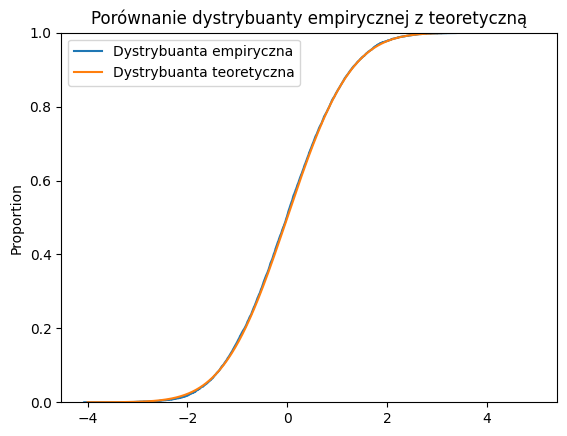

In [17]:
sns.ecdfplot(sample_using_exp, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [27]:
def ratio_of_uniforms(mi, sigma, n):
    lista_x = []
    lista_y = []
    sigmas = [sigma] * n
    mis = [mi] * n
    while len(lista_x) < n:
        x_losowy = random.uniform(0,1)
        y_losowy = random.uniform(-1,1)
        if -2*x_losowy*np.sqrt((-1)*np.log(x_losowy))<y_losowy<2*x_losowy*np.sqrt((-1)*np.log(x_losowy)):
            lista_x.append(x_losowy)
            lista_y.append(y_losowy)
    arr1 = np.array(lista_x)
    arr2 = np.array(lista_y)
    odp = arr2/arr1
    return np.add(np.divide(odp,sigmas), mis)


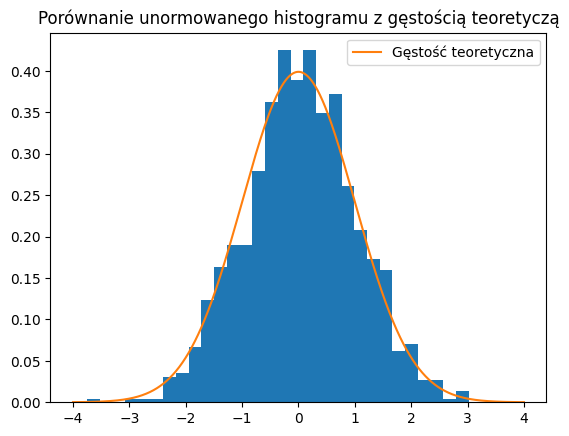

In [38]:
sample_ratio_of_uni = ratio_of_uniforms(mi, sigma, n_norm)
plt.hist(sample_ratio_of_uni, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

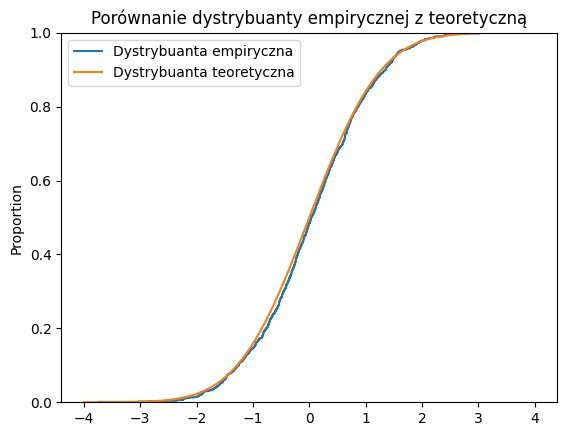

In [39]:
sns.ecdfplot(sample_ratio_of_uni, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [40]:
def box_muller(n, mu, sigma):
    m1 = [mu] * n
    s1 = [sigma] * n
    samples = []
    while len(samples) < n:
        u = np.random.random()
        v = np.random.random()
        r = np.sqrt(-2 * np.log(u))
        theta = 2 * np.pi * v
        samples.append(r * np.cos(theta))
        samples.append(r * np.sin(theta))
    return np.add(np.multiply(samples, s1), m1)

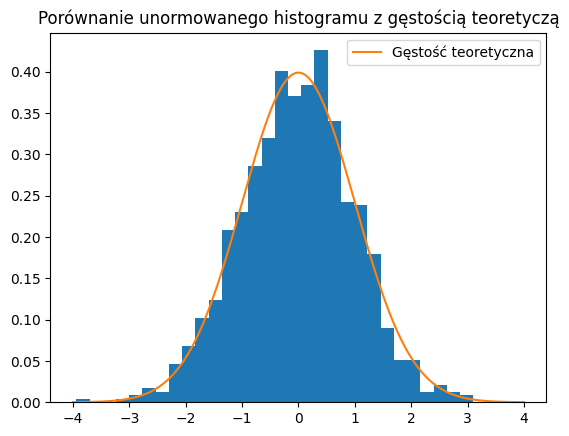

In [41]:
sample_box_muller = box_muller(n_norm, mi, sigma)
plt.hist(sample_box_muller, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

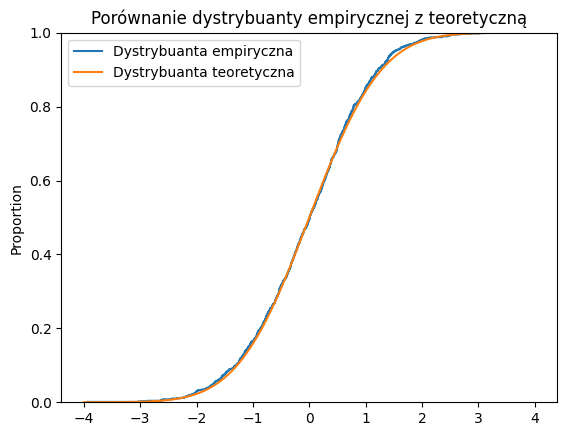

In [42]:
sns.ecdfplot(sample_box_muller, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [43]:
def marsaglia(n, mi, sigma):
    sigmas = [sigma] * n
    mis = [mi] * n
    samples = []
    while len(samples) < n:
        y1, y2 = np.random.uniform(-1,1,2)
        r = y1**2 + y2**2
        if r < 1:
            y = np.sqrt(-2*np.log(r)/r)
            x1, x2 = y1 * y, y2 * y
            samples.append(x1)
            samples.append(x2)
    return np.add(np.multiply(samples,sigmas), mis)

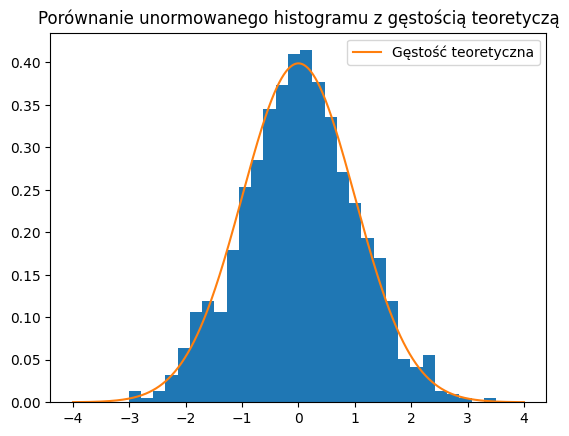

In [62]:
sample_marsaglia = marsaglia(n_norm, mi, sigma)
plt.hist(sample_marsaglia, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

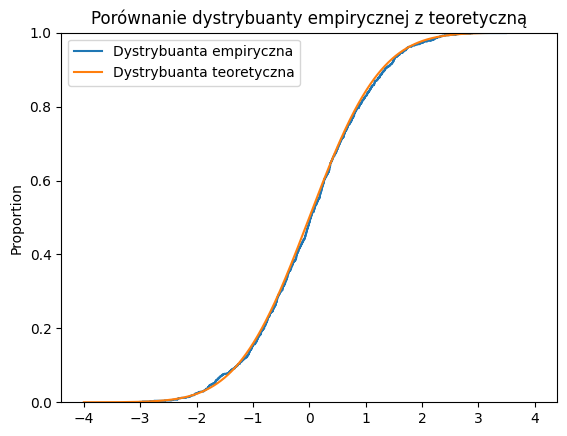

In [63]:
sns.ecdfplot(sample_marsaglia, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()